In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()

In [4]:
y=np.array(housing.target[0:])

In [5]:
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [6]:
print(housing.feature_names[0:])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
housing = pd.DataFrame(housing.data, columns=housing.feature_names)

In [8]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
housing['price']=y

In [10]:
housing.columns=housing.columns.str.lower().str.replace(" ","_")

In [11]:
housing.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
idx=np.arange(20640)

In [13]:
idx

array([    0,     1,     2, ..., 20637, 20638, 20639], shape=(20640,))

In [14]:
np.random.seed(100)
np.random.shuffle(idx)

In [15]:
idx

array([ 8151,    53,  3039, ..., 12119, 14147,  5640], shape=(20640,))

<Axes: xlabel='price', ylabel='Count'>

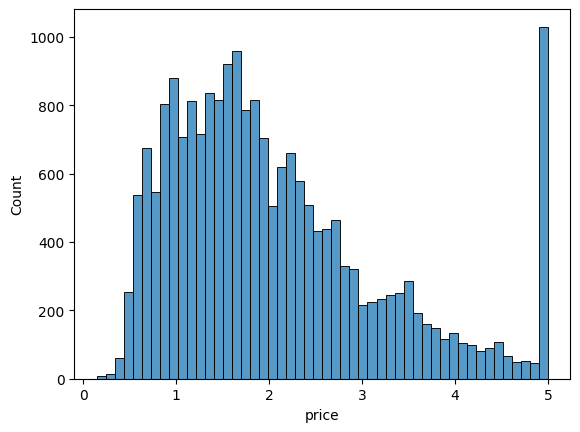

In [16]:
sns.histplot(housing['price'],bins=50)

In [17]:
housing['price']=np.log1p(housing['price'])

In [18]:
y[8152]

np.float64(2.46)

<Axes: xlabel='price', ylabel='Count'>

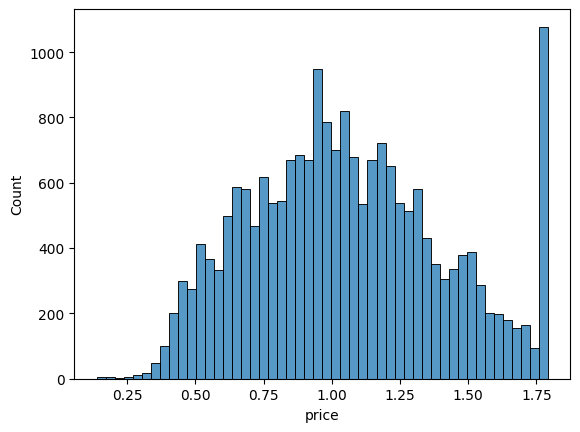

In [19]:
sns.histplot(housing['price'],bins=50)

In [20]:
n=int(len(housing))

In [21]:
n_val=int(len(housing)*.2)

In [22]:
n_test=int(len(housing)*.2)

In [23]:
housing_train=housing.iloc[idx[:n-n_val-n_test]]
housing_val=housing.iloc[idx[n-n_val-n_test:n-n_test]]
housing_test=housing.iloc[idx[n-n_test:]]

In [24]:
housing_train.reset_index(drop=True, inplace=True)

In [25]:
housing_val.reset_index(drop=True, inplace=True)

In [26]:
housing_test.reset_index(drop=True, inplace=True)

In [27]:
y_train=housing_train['price'].values

y_val=housing_val['price'].values

y_test=housing_test['price'].values

In [28]:
del housing_train['price']
del housing_val['price']
del housing_test['price']

In [29]:
y_train

array([1.23924342, 0.71392972, 0.90097403, ..., 1.51644505, 1.51116334,
       0.43825493], shape=(12384,))

In [30]:
def prepare_X(df):
    df_num = df[['medinc', 'houseage', 'averooms', 'avebedrms', 'population', 'aveoccup']]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [31]:
housing_train=prepare_X(housing_train)
housing_val=prepare_X(housing_val)
housing_test=prepare_X(housing_test)

In [32]:
def linear_regression(X,y): 
    ones=np.ones(X.shape[0]) 
    X = np.column_stack([ones, X]) 
    w=((np.linalg.inv(X.T.dot(X)+0.01*np.eye(X.T.dot(X).shape[0])).dot(X.T)).dot(y))
    return w[0], w[1:]

In [33]:
w_0,w = linear_regression(housing_train, y_train)

In [34]:
y_pred=w_0 + housing_val.dot(w)

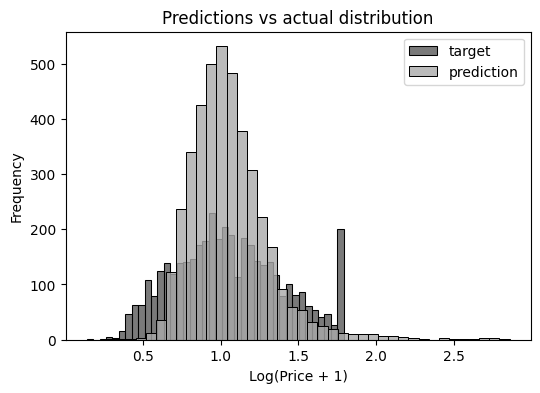

In [35]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [36]:
def rmse(y,y_pred):
    y=y.copy()
    y_pred=y_pred.copy()
    y=np.expm1(y)
    y_pred=np.expm1(y_pred)
    error=y-y_pred
    se=error**2
    mse=se.mean()
    return np.sqrt(mse)

In [37]:
rmse(y_val,y_pred)

np.float64(0.9719727750230132)